In [5]:
from google.colab import files
files.upload()


Saving train.csv to train.csv


{'train.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\r\

In [6]:
import pandas as pd
import os

print(os.listdir())


['.config', 'train.csv', 'sample_data']


In [8]:
data.head()


NameError: name 'data' is not defined

In [9]:
%whos


Variable   Type      Data/Info
------------------------------
files      module    <module 'google.colab.fil<...>s/google/colab/files.py'>
os         module    <module 'os' (frozen)>
pd         module    <module 'pandas' from '/u<...>ages/pandas/__init__.py'>


In [10]:
import pandas as pd
data = pd.read_csv("train.csv")


In [11]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns
data.drop(['Cabin','Ticket','Name','PassengerId'], axis=1, inplace=True)

# Check again
data.isnull().sum()


/tmp/ipython-input-221522090.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-221522090.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [16]:
X = data.drop('Survived', axis=1)
y = data['Survived']


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


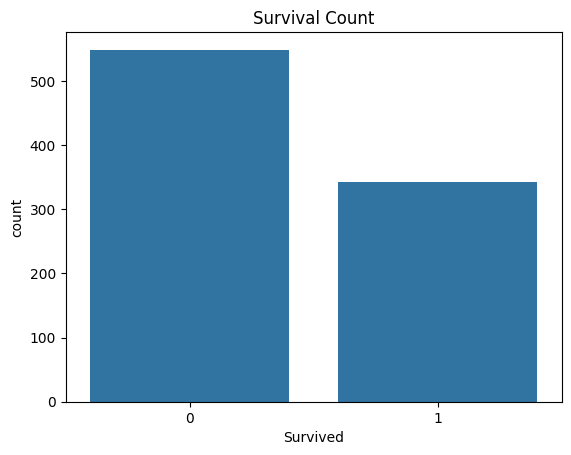

In [20]:
sns.countplot(x=y)
plt.title("Survival Count")
plt.show()


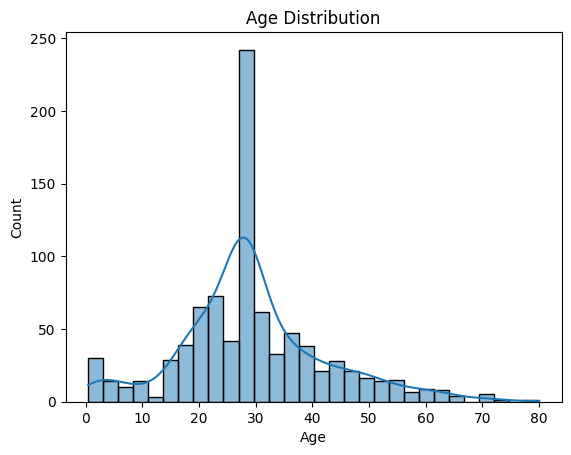

In [21]:
sns.histplot(data['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


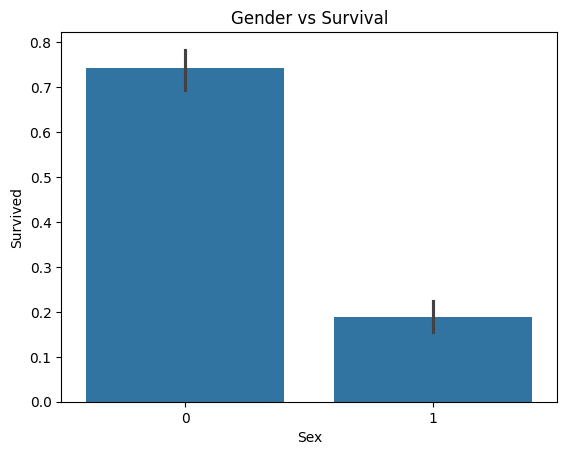

In [22]:
sns.barplot(x=data['Sex'], y=y)
plt.title("Gender vs Survival")
plt.show()


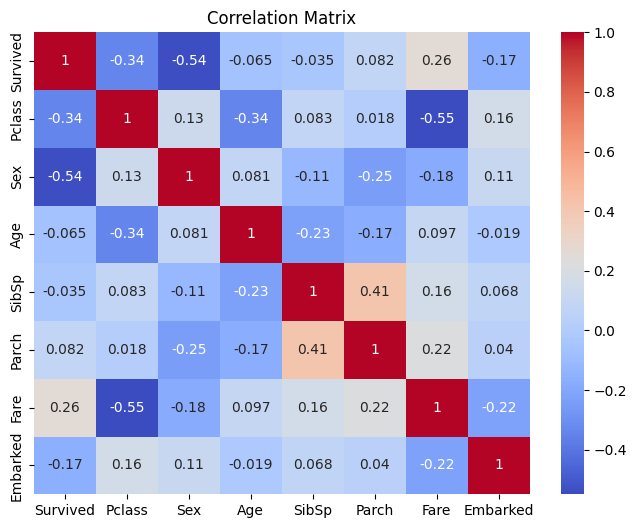

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)


In [26]:
svm = SVC()
svm.fit(X_train, y_train)

pred_svm = svm.predict(X_test)


In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)


In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)


In [29]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def evaluate(name, y_test, pred):
    print("----", name, "----")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred))
    print("Recall:", recall_score(y_test, pred))
    print("F1 Score:", f1_score(y_test, pred))
    print("ROC AUC:", roc_auc_score(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("\n")


In [31]:
evaluate("Logistic Regression", y_test, pred_lr)
evaluate("SVM", y_test, pred_svm)
evaluate("Decision Tree", y_test, pred_dt)
evaluate("Random Forest", y_test, pred_rf)
evaluate("XGBoost", y_test, pred_xgb)


---- Logistic Regression ----
Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297
F1 Score: 0.7552447552447552
ROC AUC: 0.7934362934362935
Confusion Matrix:
 [[90 15]
 [20 54]]


---- SVM ----
Accuracy: 0.8156424581005587
Precision: 0.8153846153846154
Recall: 0.7162162162162162
F1 Score: 0.762589928057554
ROC AUC: 0.800965250965251
Confusion Matrix:
 [[93 12]
 [21 53]]


---- Decision Tree ----
Accuracy: 0.7877094972067039
Precision: 0.7368421052631579
Recall: 0.7567567567567568
F1 Score: 0.7466666666666667
ROC AUC: 0.7831402831402832
Confusion Matrix:
 [[85 20]
 [18 56]]


---- Random Forest ----
Accuracy: 0.8156424581005587
Precision: 0.7887323943661971
Recall: 0.7567567567567568
F1 Score: 0.7724137931034483
ROC AUC: 0.806949806949807
Confusion Matrix:
 [[90 15]
 [18 56]]


---- XGBoost ----
Accuracy: 0.7988826815642458
Precision: 0.7567567567567568
Recall: 0.7567567567567568
F1 Score: 0.7567567567567568
ROC AUC: 0.7926640926640927
Confusion Matrix:
 

In [32]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators':[50,100],
    'max_depth':[5,10]
}

grid = GridSearchCV(RandomForestClassifier(), param)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 5, 'n_estimators': 50}


In [33]:
best_rf = RandomForestClassifier(max_depth=5, n_estimators=50)

best_rf.fit(X_train, y_train)

final_pred = best_rf.predict(X_test)

evaluate("Tuned Random Forest", y_test, final_pred)


---- Tuned Random Forest ----
Accuracy: 0.8156424581005587
Precision: 0.8360655737704918
Recall: 0.6891891891891891
F1 Score: 0.7555555555555555
ROC AUC: 0.796975546975547
Confusion Matrix:
 [[95 10]
 [23 51]]


